<a href="https://colab.research.google.com/github/zakiarsyad/Finance-Approval/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library yang diperlukan

!pip install xlrd

In [ ]:
# Menghubungkan ke Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Mengimport dataset dari Google Drive

import pandas as pd

data = pd.read_excel('gdrive/My Drive/finance_approval_data.xlsx')
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis

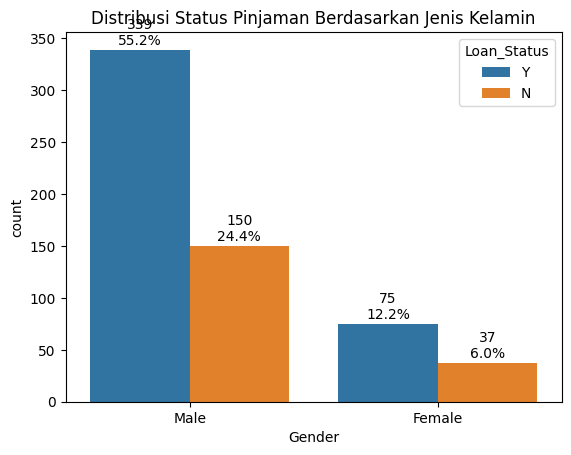

In [ ]:
# Distribusi Loan_Status berdasarkan Gender

import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menambahkan angka dan persentase di atas setiap bar
def annotate_countplot(ax, data):
    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = '{:.1f}%'.format(100 * count / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 5
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center')

ax = sns.countplot(data=data, x='Gender', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Jenis Kelamin')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa laki-laki memiliki potensi lebih tinggi mendapatkan pinjaman.

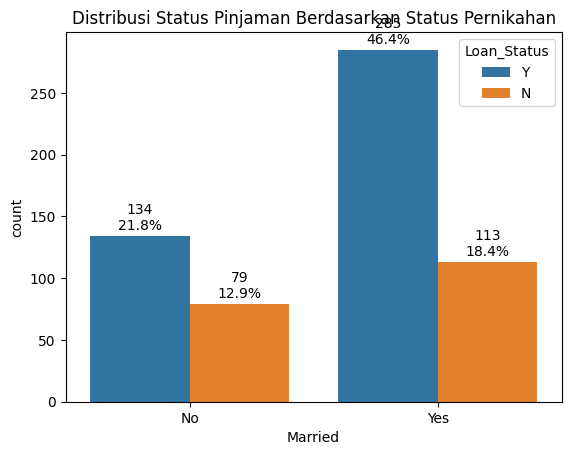

In [ ]:
# Distribusi Loan_Status berdasarkan Married

ax = sns.countplot(data=data, x='Married', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Status Pernikahan')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa orang yang sudah menikah memiliki potensi lebih tinggi mendapatkan pinjaman.

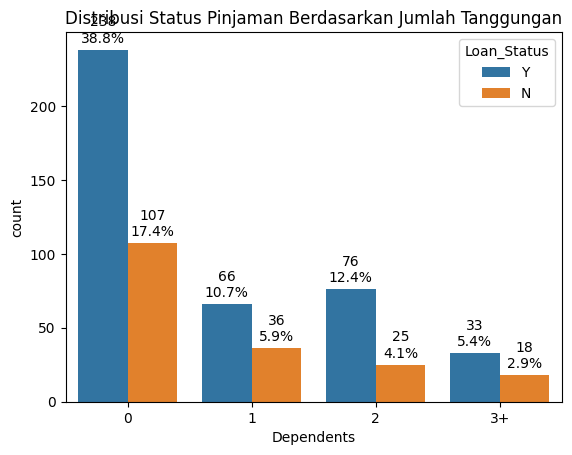

In [ ]:
# Distribusi Loan_Status berdasarkan Dependents

ax = sns.countplot(data=data, x='Dependents', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Jumlah Tanggungan')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa orang yang belum memiliki tanggungan berpotensi lebih tinggi mendapatkan pinjaman.

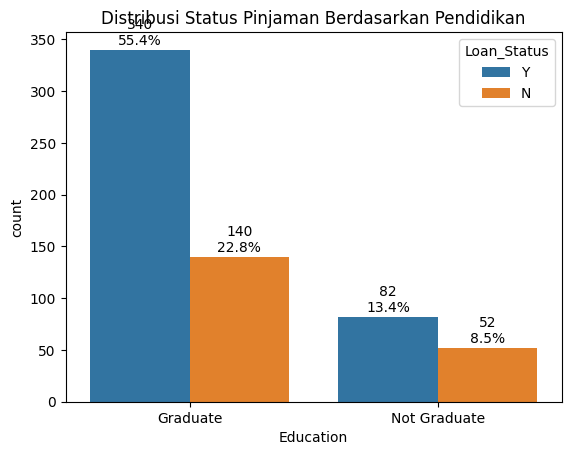

In [ ]:
# Distribusi Loan_Status berdasarkan Education

ax = sns.countplot(data=data, x='Education', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Pendidikan')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa orang yang memiliki latar belakang pendidikan berpotensi lebih tinggi mendapatkan pinjaman.

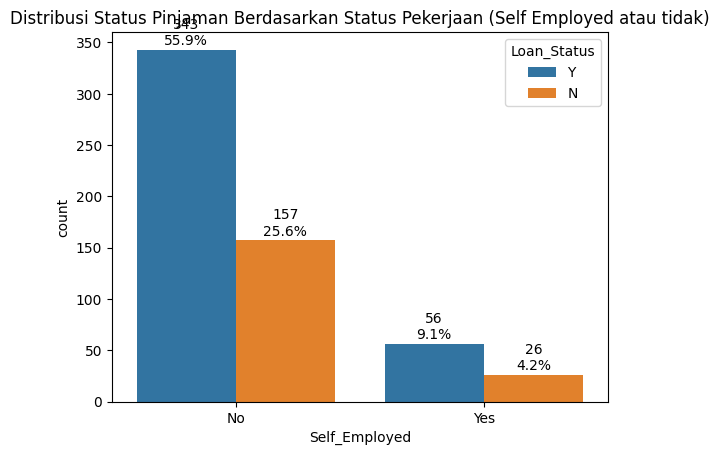

In [ ]:
# Distribusi Loan_Status berdasarkan Self_Employed

ax = sns.countplot(data=data, x='Self_Employed', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Status Pekerjaan (Self Employed atau tidak)')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa orang yang bekerja pada perusahaan (bukan self employed) berpotensi lebih tinggi mendapatkan pinjaman.

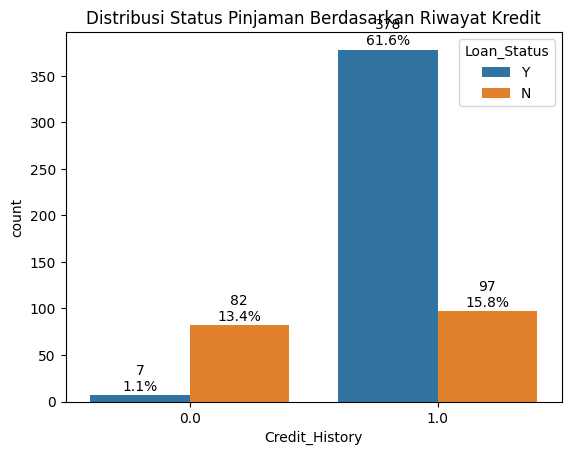

In [ ]:
# Distribusi Loan_Status berdasarkan Credit_History

ax = sns.countplot(data=data, x='Credit_History', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Riwayat Kredit')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa orang yang memiliki riwayat kredit  berpotensi lebih tinggi mendapatkan pinjaman.

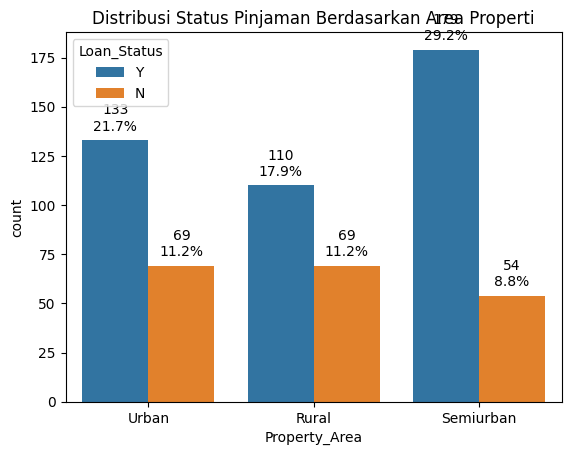

In [ ]:
# Distribusi Loan_Status berdasarkan Property_Area

ax = sns.countplot(data=data, x='Property_Area', hue='Loan_Status')
plt.title('Distribusi Status Pinjaman Berdasarkan Area Properti')
annotate_countplot(ax, data)
plt.show()

Dari data tersebut, ditunjukkan bahwa orang yang tinggal di area semiurban berpotensi lebih tinggi mendapatkan pinjaman.

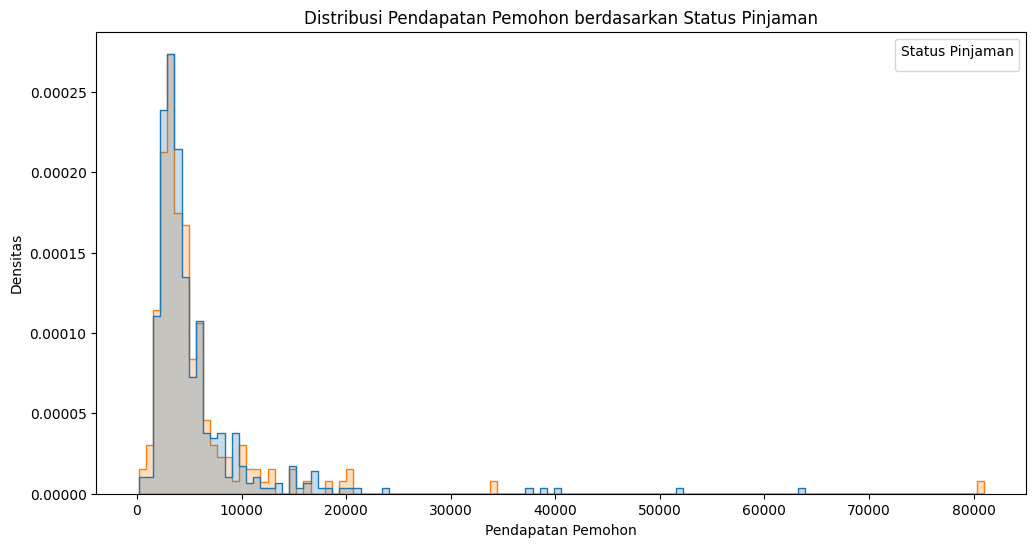

In [ ]:
# Distribusi ApplicantIncome dengan hue Loan_Status

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='ApplicantIncome', hue='Loan_Status', element='step', stat="density", common_norm=False)
plt.title('Distribusi Pendapatan Pemohon berdasarkan Status Pinjaman')
plt.xlabel('Pendapatan Pemohon')
plt.ylabel('Densitas')
plt.legend(title='Status Pinjaman')
plt.show()

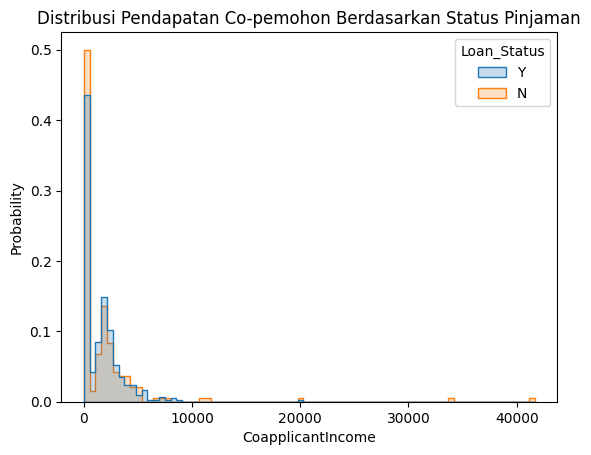

In [ ]:
# Distribusi CoapplicantIncome dengan hue Loan_Status

sns.histplot(data=data, x='CoapplicantIncome', hue='Loan_Status', element="step", stat="probability", common_norm=False)
plt.title('Distribusi Pendapatan Co-pemohon Berdasarkan Status Pinjaman')
plt.show()

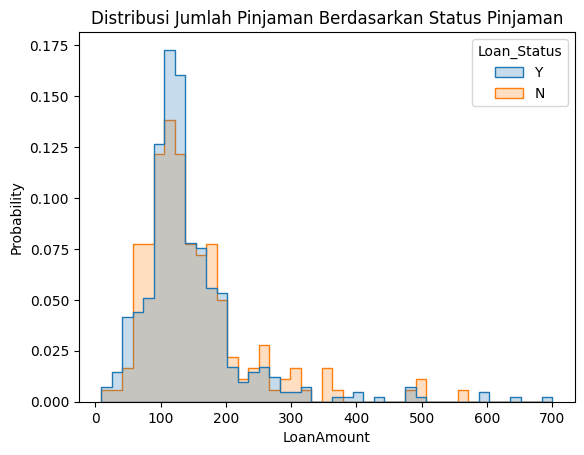

In [ ]:
# Distribusi LoanAmount dengan hue Loan_Status

sns.histplot(data=data, x='LoanAmount', hue='Loan_Status', element="step", stat="probability", common_norm=False)
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Status Pinjaman')
plt.show()

# Data Cleaning

In [ ]:
# Melihat tipe data dan nilai non-null

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Cek missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Fitur Kategorikal (Gender, Married, Dependents, Self_Employed):
# Mengisi dengan modus (nilai yang paling sering muncul).

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [ ]:
# Fitur Numerik (LoanAmount, Loan_Amount_Term):
# Mengisi dengan median, karena median lebih tahan terhadap outlier dibandingkan dengan mean.

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [ ]:
# Fitur Binary (Credit_History):
# Mengisi dengan modus, karena ini adalah fitur biner.

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [ ]:
# Cek kembali missing values

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Encoding

In [ ]:
# ApplicantIncome: Sudah dalam format yang benar yaitu int64.

# CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History: Semua kolom ini sudah dalam format yang benar yaitu float64.

In [ ]:
# Loan_ID: Tidak digunakan.
data = data.drop('Loan_ID', axis=1)

In [ ]:
# Dependents: Kolom ini memiliki nilai seperti '1', '2', '3+',
# yang berarti untuk mengolahnya dengan lebih baik, kita harus mengubah '3+' menjadi '4'
# dan mengubah tipe data menjadi int.

data['Dependents'] = data['Dependents'].replace('3+', '3')
data['Dependents'] = data['Dependents'].astype('int64')

In [ ]:
# Mengolah kolom Credit_History
# Ubah tipe data ke int64.

data['Credit_History'] = data['Credit_History'].astype('int64')

In [ ]:
# Melakukan pengkodean one-hot encoding untuk fitur kategorikal

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Melakukan label encoding untuk target variable

label_encoder = LabelEncoder()
encoded_data['Loan_Status'] = label_encoder.fit_transform(encoded_data['Loan_Status'])

encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    int64  
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Education_Not Graduate   614 non-null    uint8  
 10  Self_Employed_Yes        614 non-null    uint8  
 11  Property_Area_Semiurban  614 non-null    uint8  
 12  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 37.3 KB


In [ ]:
# Memisahkan fitur and target

X = encoded_data.drop('Loan_Status', axis=1)
y = encoded_data['Loan_Status']

# Model Multilayer perceptron

In [ ]:
# Membagi data test dan data train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat sebuah function untuk mengevaluasi model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

In [ ]:
# Membuat basic model MLP

from sklearn.neural_network import MLPClassifier

default_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
default_model.fit(X_train, y_train)
accuracy_default, precision_default, recall_default, f1_default = evaluate_model(default_model, X_test, y_test)

In [ ]:
# Membuat model MLP dengan GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'max_iter': [500, 1000],
    'learning_rate_init': [0.001, 0.01]
}
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
accuracy_tuned, precision_tuned, recall_tuned, f1_tuned = evaluate_model(best_model, X_test, y_test)

In [ ]:
# Tampilkan hasil
print("Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)
print("\n")
print("Best-Tuned Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Default Model:
Accuracy: 0.6422764227642277
Precision: 0.6475409836065574
Recall: 0.9875
F1 Score: 0.7821782178217822


Best-Tuned Model:
Accuracy: 0.6504065040650406
Precision: 0.6504065040650406
Recall: 1.0
F1 Score: 0.7881773399014779
